<a href="https://colab.research.google.com/github/sonalshreya/Machine-Learning/blob/main/House_Price_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Build an end-to-end ML pipeline to predict house prices and analyze how different features (like location, size, age, etc.) influence the prediction using various regression and tree-based models, and evaluate their effectiveness.

Ames Housing Dataset

In [2]:
import sklearn
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [3]:
sklearn.datasets.fetch_california_housing()

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
data=fetch_california_housing(as_frame=True)
df=data.frame

print(df.head())
print(df.describe())
df.info()



   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.3333

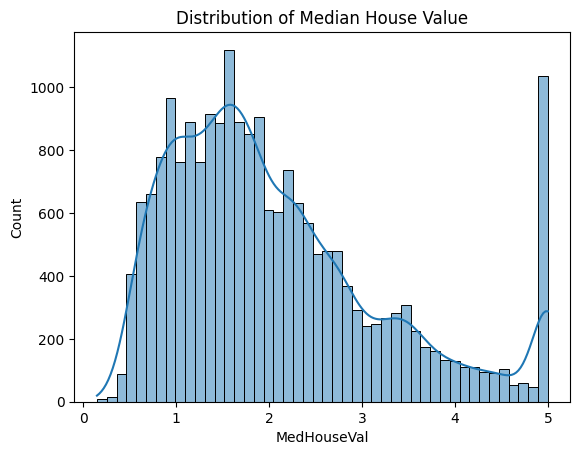

In [6]:
sns.histplot(df['MedHouseVal'], kde=True)
plt.title('Distribution of Median House Value')
plt.show()

In [7]:
#Preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X=df.drop(columns=['MedHouseVal'])
y=df['MedHouseVal']

#Train/test split
X_train, X_test, y_train, y_test= train_test_split(X, y , test_size=0.2, random_state=42)

#Feature Scaling
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
print(X_train_scaled)
print(X_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

[[-0.326196    0.34849025 -0.17491646 ...  0.05137609 -1.3728112
   1.27258656]
 [-0.03584338  1.61811813 -0.40283542 ... -0.11736222 -0.87669601
   0.70916212]
 [ 0.14470145 -1.95271028  0.08821601 ... -0.03227969 -0.46014647
  -0.44760309]
 ...
 [-0.49697313  0.58654547 -0.60675918 ...  0.02030568 -0.75500738
   0.59946887]
 [ 0.96545045 -1.07984112  0.40217517 ...  0.00707608  0.90651045
  -1.18553953]
 [-0.68544764  1.85617335 -0.85144571 ... -0.08535429  0.99543676
  -1.41489815]]
(4128, 8)
(16512,)
(4128,)


In [10]:
#Linear and Regularized Regression

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

models={
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=0.1),
    "Lasso": Lasso(alpha=0.1),
    "ElasticNet" : ElasticNet(alpha=0.1, l1_ratio=0.5)
}

for name,model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred=model.predict(X_test_scaled)
    mse=mean_squared_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)
    print(F"{name}: MSE={mse:3f}, R2={r2:3f}")


LinearRegression: MSE=0.555892, R2=0.575788
Ridge: MSE=0.555888, R2=0.575791
Lasso: MSE=0.679629, R2=0.481361
ElasticNet: MSE=0.635857, R2=0.514765


In [11]:
#Decision Trees and Ensembles

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

tree_models={
    "DecisionTree" : DecisionTreeRegressor(max_depth=6),
    "RandomForest" : RandomForestRegressor(n_estimators=100),
    "GradientBoosting" : GradientBoostingRegressor(n_estimators=100)

}

for name, model in tree_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse=mean_squared_error(y_test,y_pred)
    r2=r2_score(y_test, y_pred)
    print(f"{name}: MSE={mse:3f}, R2={r2:3f}")



DecisionTree: MSE=0.497284, R2=0.620513
RandomForest: MSE=0.255382, R2=0.805113
GradientBoosting: MSE=0.294079, R2=0.775582


In [12]:
#Cross Validation

from sklearn.model_selection import cross_val_score

model= RandomForestRegressor()
scores = cross_val_score(model,X,y,cv=5,scoring='r2')
print(f"Cross-validated R2 scores: {scores}")
print(f"Mean R2:{scores.mean():3f}")


Cross-validated R2 scores: [0.49336639 0.70215562 0.74098182 0.62462671 0.67992123]
Mean R2:0.648210


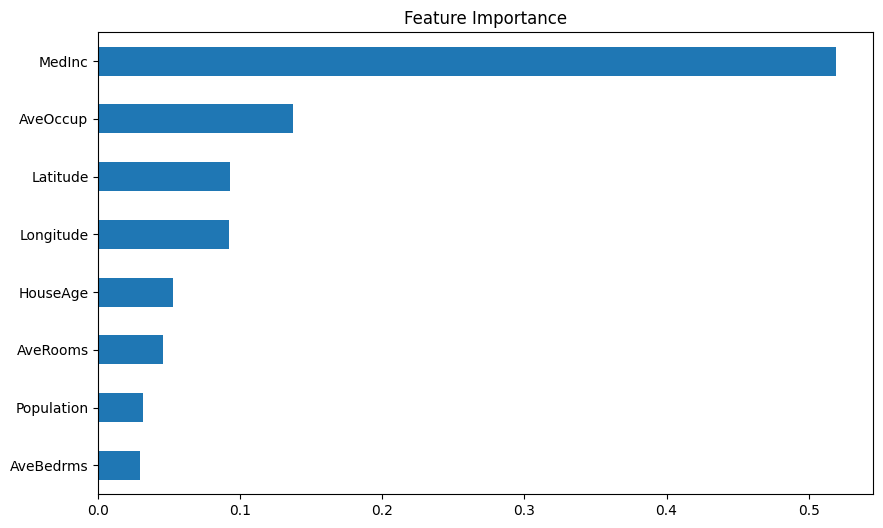

In [13]:
#Feature Importance
#rf.feature_importances_ is an array of numbers (one per feature) indicating how important each feature was in making predictions.

rf=RandomForestRegressor()
rf.fit(X,y)

feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance.sort_values().plot(kind='barh', figsize=(10,6))
plt.title("Feature Importance")
plt.show()